복 있는 사람은 악인들의 꾀를 따르지 아니하며 죄인들의 길에 서지 아니하며 오만한 자들의 자리에 앉지 아니하고 오직 여호와의 율법을 즐거워하여 그의 율법을 주야로 묵상하는도다 그는 시냇가에 심은 나무가 철을 따라 열매를 맺으며 그 잎사귀가 마르지 아니함 같으니 그가 하는 모든 일이 다 형통하리로다 (시1:1-3)

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MLwithPython.png?raw=true" width=1000></center>

__NOTE:__ The following materials have been compiled and adapted from the numerous sources including my own. Please help me to keep this tutorial up-to-date by reporting any issues or questions. Send any comments or criticisms to `idebtor@gmail.com` Your assistances and comments will be appreciated.

# 제 3-1 강: 인공뉴론 동작 원리와 구현 

## 학습 목표

    - 인공뉴론의 동작 원리를 이해한다
    - AND 게이트 뉴론을 구현한다

## 학습 내용
    - 인공뉴론의 동작 원리
    - AND 게이트 뉴론의 구현
    - AND 게이트 뉴론의 시각화


## 1. 인공뉴론의 동작 원리

앞에 강의에서 정의한 마일 변환 함수와 인공뉴론의 모델을 보면서 인공뉴론의 동작 원리를 살펴보겠습니다. 

<table><tr>
    <td><center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/neuron_model.PNG?raw=true" width="400"/></center></td> 
    <td><center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch2/mile2km.PNG?raw=true" width="400"></center> </td> 
</tr></table>
<center>그림 1: 인공뉴론의 모델과 마일변환 함수</center>

### 1.1 뉴론의 활성화, 가중치와 임계값


`mileToKm`함수를 인공신경망과 관련한 표기법으로 다시 표현하면 다음과 같습니다. 

\begin{equation} 
y = w_1 x_1 
\end{equation}

이 함수 모양은 우리가 흔히 본 일차함수($y = ax$)의 $w$는 기울기인데, 인공신경망에서는 __가중치__$^{weight}$라고 부릅니다.  입력 $x_1$과 가중치 $w_1$을 곱하여 __인공 뉴론__ 즉 __노드__ 에 입력됩니다. 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch3/simple_node1.PNG?raw=true" width="300"></center>
<center>그림 2: 마일을 킬로미터로 변환하는 함수(인공 뉴론)</center>

다만, $x$와 $w$에 밑첨자 1이 있다는 것은 앞으로 입력과 가중치가 여러 개가 될 수 있다는 것을 짐작할 수 있습니다.  따라서 2개의 입력 신호를 받는 뉴론의 경우에는 각각의 입력과 가중치가 곱해진 값($w_1x_1, w_2x_2$)이 뉴론에 입력되고 뉴론에서 그 값들의 총합($w_1x_1 + w_2x_2$)이 정해진 한계를 넘어설 때만 뉴론에서 출력이 이루어집니다. 이 때 그 __'뉴론이 활성화 되었다'__ 라고 말합니다.  

또한, 이 때 뉴론이 활성화되느냐 혹은 비활성화되느냐를 결정하도록 정해진 한계를 **임계값**$^{threshold}$이라고 하며 $\theta^{세타}$로 나타냅니다.  이것이 기본적인 뉴론의 동작 원리입니다. 수식으로 표현하면 식(1)이 됩니다.

\begin{align}
  \ y = \begin{cases}
   \ 0 & \text{if $(w_1x_1 + w_2x_2 <= \theta)$}\\
      1 & \text{if $(w_1x_1 + w_2x_2 > \theta)$} \ \tag{1} \\
  \end{cases} 
\end{align} 

<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch3/simple_node2.PNG?raw=true" width="300"></center>
<center>그림 3: 두 개의 입력과 임계값을 가진 뉴론</center>

여러 개의 입력과 가중치와 더불어 많은 뉴론들이 서로 연결되어 연산이 가능한 인공신경망의 구조를 완성합니다.  기계학습이나 딥러닝은 각 노드를 연결하는 가중치를 알아내는 것입니다.  기계학습이란 마치 각각의 뉴런을 연결하는 시냅스의 적절한 임계값을 찾는 것과 같습니다. 

### 1.2 편향$^{bias}$

위에 기술된 식(1)에서 $\theta$를 $-b$로 이름하고 이를 좌편으로 넘기면 다음과 같이 표현할 수 있습니다.  여기서 $b$를 편향(절편)$^{bias}$이라고 부릅니다.  

\begin{equation}
  \ y =\begin{cases}
   \ 0 & \text{if $(b + w_1x_1 + w_2x_2 <= 0) $}\\
      1 & \text{if $(b + w_1x_1 + w_2x_2 > 0) $} \ \tag{2} \\
  \end{cases} 
\end{equation}



<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch3/simple_node3.PNG?raw=true" width="300">
<center>그림 4: 두 개의 입력과 편향을 가진 뉴론</center>

뉴론의 입력값에 가중치를 곱한 값과 편향을 합하여, 그 값이 0 이상이면 1을 출력하고 그렇지 않으면 0을 출력합니다.   여기서는 우리가 가중치와 임계값을 임의로 설정을 하지만, 기계가 스스로 학습하여 이러한 가중치와 임계값을 설정하도록 하는 것이 앞으로 우리가 공부할 기계학습의 상당히 중요한 부분입니다.

<span style="color:purple">편향을 사용함으로써, 우리가 만든 인공 뉴론에 유연성을 줄 수 있습니다. 다르게 설명하자면, 편향은 인공 뉴론에서 항상 켜져있는 노드라고 볼 수 있으며, 노드에 들어오는 데이터의 값에 곱해지는 가중치와 다르게 편향은 1의 값이 곱해져서 $wx$ 값에 더해집니다. 인공뉴론 모델에도 b로 표기되어 있습니다. 
    
    
참고로, 계산을 단순하게 하기 위해 일반적으로 [$b, w_1, w_2, ...$] 와 [$1, x_1, x_2, ...$] 를 내적하게 됩니다. 내적은 선형대수학에 나오는 개념이며, 파이썬에서 이러한 연산을 하기 위해 넘파이$^{numpy}$ 라이브러리를 사용합니다.<span> <span style="color:green">넘파이$^{numpy}$는 파이썬에서 제공하는 라이브러리로, 대규모의 데이터를 처리하고 연산하기 위한 배열에 대한 다양한 기능을 제공합니다.</span> <span style="color:purple">넘파이와 관련된 내용은 필요할 때마다 자주 다루도록 하겠습니다.</span>

__예제 1__: 학습을 통해 다음의 가중치 $w$ 가 학습되었고, 임계값 $\theta$ 와 입력값 $x_1, x_2$ 가 주어졌다고 가정합시다. 뉴런이 활성화될까요?

- $\mathbf{w} = (w_1, w_2) = (0.6, 0.3)$ 
- $\theta = 0.5$
- $(x_1, x_2) = (0, 1)$

(1) 활성화 된다<br>
(2) 활성화되지 않는다

__예제풀이__: (2)
\begin{align}   
    w_1 x_1 + w_2 x_2 &= 0.6 \times 0 + 0.3 \times 1\\
    &= 0.3 < \theta\\
\end{align}


-----------

__예제 2__: 학습을 통해 다음의 가중치 $w$ 가 학습되었고, 임계값 $\theta$ 와 입력값 $x_1, x_2$ 가 주어졌다고 가정합시다. 뉴런이 활성화될까요?

- $\mathbf{w} = (w_1, w_2) = (0.6, 0.3)$ 
- $\theta = 0.5$
- $(x_1, x_2) = (1, 0)$

(1) 활성화 된다<br>
(2) 활성화되지 않는다

__예제풀이__: (1)

\begin{align}   
    w_1 x_1 + w_2 x_2 &= 0.6 \times 1 + 0.3 \times 0\\
    &= 0.6 > \theta\\
\end{align}

-----------

## 2. 논리 회로$^{logic \  gate}$ 

논리 회로는 하나 이상의 논리적 입력값(참$^{true}$, 거짓$^{false}$)에 대해 논리 연산을 수행하여 하나의 논리적 출력값을 얻는 전자회로입니다.  AND, OR, NOT 회로는 기본적인 불리안 논리 대수를 수행하며, 이런 기본 불리안 대수들의 결합으로 복합적인 논리 기능 즉 NAND, NOR, XOR 같은 다소 복잡한 논리 기능도 수행합니다. 

다음은 각 논리 회로의 진리표를 보여줍니다. 여기서 $x_1$, $x_2$는 두 개의 입력을 의미하고, 그 외의 다른 열들은 두 입력에 대한 해당 논리 회로(게이트)의 출력을 나타냅니다. 0는 false, 1은 true를 의미합니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch3/truthtable.png?raw=true" width="500">
<center>그림 5: 논리 회로의 진리표 </center>


### 2.1 AND 게이트 구현하기

지금까지 배운 것으로 AND(논리곱) 게이트 뉴론을 구현하기로 합시다. 뉴론을 만든다는 것은 곧 AND 함수를 구현하는 것입니다. AND 게이트의 진리표의 입력 $x_1, x_2$ 신호를 보내면 뉴론은 $y$의 값을 출력합니다.  

AND 함수를 구현하기 전에 다음 예제 문제를 풀어보면 우리에게 약간의 단서가 될 만한 정보가 있을 것입니다. 

\begin{equation}
  \ y =\begin{cases}
   \ 0 & \text{if $(b + w_1x_1 + w_2x_2 <= 0) $}\\
     1 & \text{if $(b + w_1x_1 + w_2x_2 > 0) $} \ \tag{2} \\
  \end{cases} 
\end{equation} 

__예제 3__: AND 게이트를 수행하는 뉴론을 만들고자 합니다. 수식 (2)를 만족시키는 아래의 가중치, 편향의 조합 중에서 AND 게이트를 수행하는 조합을 찾아보세요.

(1) $(w_1, w_2) = (0.5, 0.5)$, $b=-0.7$<br>
(2) $(w_1, w_2) = (0.5, 0.5)$, $b=-0.3$<br>
(3) $(w_1, w_2) = (0.5, 0.5)$, $b=0.2$

__예제풀이__: (1)

-----------

위의 예제에서 사용한 가중치와 편향을 사용해서 아래와 같이 AND 게이트를 수행하는 인공 뉴론을 만들 수 있습니다.

In [ ]:
import numpy as np

def AND(x1, x2):
    x = np.array([1, x1, x2])         # input
    w = np.array([-0.7, 0.5, 0.5])    # bias + weight
    return np.dot(x, w) > 0

In [ ]:
print("AND(False, False) = ", AND(False, False))
print("AND(False, True) = ", AND(False, True))
print("AND(True, False) = ", AND(True, False))
print("AND(True, True) = ", AND(True, True))

여기서 한 가지 유의할 것은 가중치 즉 $w_1, w_2$는 입력이 결과에 주는 영향력을 조절하는 매개변수이며, 편향은 뉴론이 얼마나 쉽게 활성화 되는지를 조정합니다. 

$b$는 편향으로 구별되기도 하지만 위의 AND 함수에서 입력한 것과 같이 $x_0=1, w_0=b$ 라고 간주하여 $\mathbf{wx}$로 일괄 처리할 수 있습니다. 

### 2.2 AND 게이트의 시각화

우리가 구현한 $AND$논리 함수를 식(2)의 조건문을 이용하여 $x_1, x_2$에 대한 2차원 그래프로 그려보면 우리에게 흥미로운 점들을 관찰할 수 있습니다. 우리가 $w_1, w_2$를 각각 `0.5`로 설정했으며, `b` 즉 $-\theta$를 `-0.7`로 설정했으므로 식(2)의 조건문들은 다음과 같이 됩니다. 

  \begin{cases}
   -0.7 + 0.5x_1 + 0.5x_2 <= 0 \\
   -0.7 + 0.5x_1 + 0.5x_2 > 0 \tag{3} \\
  \end{cases} 

식(3)을 $x_1$을 독립변수, $x_2$를 종속변수로 삼아 다시 표현하면, 일차함수 $y = ax + b$와 같은 형식의 하나의 직선으로 나타낼 수 있습니다.  

  \begin{align}
   -0.7 + 0.5x_1 + 0.5x_2 &= 0 \\
   x_2 &= -\frac{0.5}{0.5}x_1 + \frac{0.7}{0.5} \\
   x_2 &= -x_1 + 1.4 \tag{4} \\ 
   \end{align}

식(4)를 그래프로 나타내면 기울기가 `-1.0`이며, $x_2$절편이 `1.4`인 직선입니다.  이 직선을 중심으로 `(1, -1)` 빨간 점을 포함하는 왼쪽 아랫 부분은 $−0.7+0.5x_1+0.5x_2<=0$ 경우이며, `(1, 1)` 파란 점을 포함하는 오른쪽 윗 부분은 $−0.7+0.5x_1+0.5x_2 > 0$ 경우입니다. 

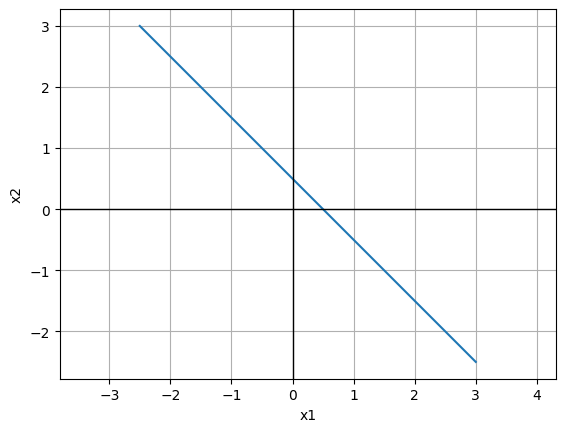

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np
%matplotlib inline

# code to plot the line b + w_1 x_1 + w_2 x_2 = 0
w1 = 0.5
w2 = 0.5
b = -0.7
x1 = np.arange(-2.5, 3.5, .5)

# 선형 결정 경계를 구하는 공식, 아래 두 줄이 같은 코드임
# b+w1​x1​+w2​x2​ = 0
x2 = -b/w2 - w1/w2*x1
    
plt.plot(x1, x2)    
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.axis('equal')
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
#plt.savefig('images\weights_bias.png')
plt.show()

### 2.3 가중치의 의미 

다음 코드는 난수를 발생하여 만든 몇 개의 점$(x_1, x_2)$들이 직선$(-0.7 + 0.5x_1 + 0.5x_2 = 0)$을 중심으로 어디에 위치하는 볼 수 있습니다.   

조건식(3)에 $(x_1, x_2)$을 대입하여 `0`보다 크면 파란 점(bs:blue square)으로, `0`보다 작으면 붉은 점(ro: red o)모양으로 표시한 것입니다. 

`random.randint(a, b)`는 `a, b`를 포함한 범위에서 정수의 난수를 발생합니다. `random.seed(value)`에서 `value`를 `seed`(씨앗)이라 부르며, 난수를 발생할 때 항상 정해진 난수 즉 예측 가능한 난수를 발생하기 위하여 사용합니다.  물론, `0`이외에 다른 수를 사용하면 또 다른 고유한 난수가 일정하게 발생합니다. 

In [ ]:
# code to plot some random dots
ndots = 6
np.random.seed(0)   
px1 = [np.random.randint(-2, 3) for _ in np.arange(ndots)]
px2 = [np.random.randint(-1, 3) for _ in np.arange(ndots)]
for ipx1, ipx2 in zip(px1, px2):
    if (b + w1*ipx1 + w2*ipx2) <= 0:
        plt.plot(ipx1, ipx2, 'ro')
    else:
        plt.plot(ipx1, ipx2, 'bs')

# code to plot the line b + w_1 x_1 + w_2 x_2 = 0

여기서 우리는 식(4)를 중심으로 몇 개의 점들을 발생하여 어느 지역에 속하는지 판단해 보았습니다.  그러나,  실제적으로는 몇 개의 점들 즉 자료들이 먼저 주어지고 이러한 자료들을 여기처럼 파란점과 붉은 점을 분류할 수 있도록 뉴론이나 신경망의 가중치와 절편을 구하는 과정을 기계 학습 중에 __분류$^{classification}$__ 라고 부르며, 이런 과정을 수행하는 뉴론을 __분류기$^{classifier}$__ 라고 부릅니다.

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ch3/weights_bias.png?raw=true" width="500">
<center>그림 6: 가중치와 편향을 이용한 분류</center>

In [ ]:
import numpy as np
def OR(x1, x2):
    x = np.array([1, x1, x2])         # input
    w = np.array([-0.3, 0.5, 0.5])    # bias + weight
    return np.dot(x, w) > 0

In [ ]:
print("OR(False, False) = ", OR(False, False))
print("OR(False, True) = ", OR(False, True))
print("OR(True, False) = ", OR(True, False))
print("OR(True, True) = ", OR(True, True))

### 참고자료
- CS231n Convolutional Neural Networks for Visual Recognition, [Python Numpy Tutorial](http://cs231n.github.io/python-numpy-tutorial/), Stanford University
- [Python For Data Science Cheat Sheet NumPy Basics](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf), DataCamp

## 학습 정리
- 인공뉴론의 동작 원리의 이해 
- AND게이트 뉴론의 구현과 시각화

------------------